In [1]:
import torch
from models import AudioAE, AudioAE1D
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
#sample_path = "./data/split_wav/exp_2/s10_sample2.wav"
sample_path = "./data/split_wav/exp_0/L1_sample25.wav"
sample, sr = librosa.load(sample_path, sr=44100)
sample_mel = librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=int(round(0.025 * sr)),
                                           hop_length=int(round(0.01 * sr)), n_mels=40)[..., :200]

max_value = np.max(sample_mel)
min_value = np.min(sample_mel)
sample_mel_ori = (sample_mel - min_value) / (max_value - min_value)

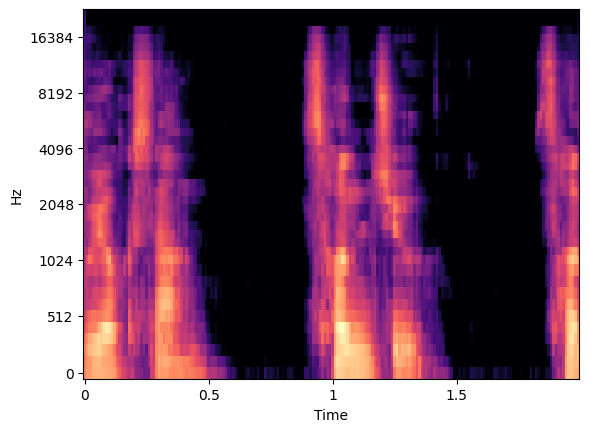

In [50]:
librosa.display.specshow(librosa.power_to_db(sample_mel_ori, ref = np.max), y_axis='mel', sr=sr, 
                         hop_length=int(round(0.01 * sr)), x_axis='time')
# plt.show()
#plt.savefig("./exp_2_s10.png")

In [8]:
#sample_path = "./data/split_wav/exp_2/s10_sample2.wav"
sample, sr = librosa.load(sample_path, sr=44100)
sample_mel = librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=int(round(0.025 * sr)),
                                           hop_length=int(round(0.01 * sr)), n_mels=40)[..., :200]
max_value = 347.70975
min_value = 0
sample_mel_re = (sample_mel - min_value) / (max_value - min_value)

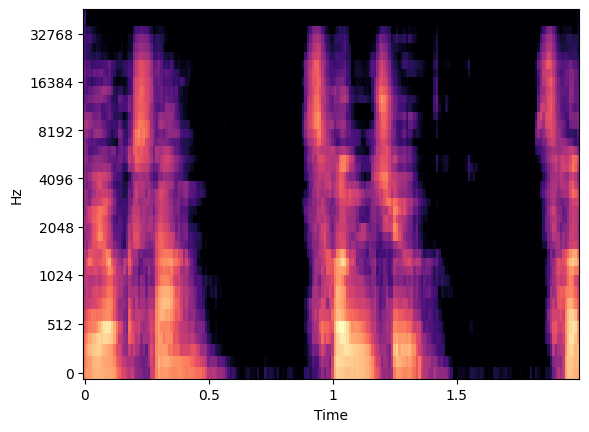

In [9]:
librosa.display.specshow(librosa.power_to_db(sample_mel_re, ref = np.max), y_axis='mel', sr=sr, 
                         hop_length=int(round(0.01 * sr)), x_axis='time')
# plt.show()
#plt.savefig("./exp_2_s10.png")

In [4]:
#sample_path = "./data/split_wav/exp_2/s10_sample2.wav"
sample, sr = librosa.load(sample_path, sr=44100)
sample_mel = librosa.feature.melspectrogram(y=sample, sr=sr, n_fft=int(round(0.025 * sr)),
                                           hop_length=int(round(0.01 * sr)), n_mels=179)[:40, :200]
max_value = 132.98563
min_value = 3.1134967e-08
sample_mel_1k = (sample_mel - min_value) / (max_value - min_value)

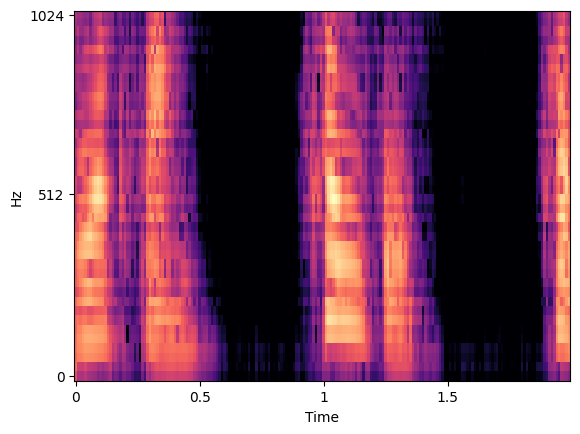

In [7]:
librosa.display.specshow(librosa.power_to_db(sample_mel_1k, ref = np.max), y_axis='mel', sr=sr, 
                         hop_length=int(round(0.01 * sr)), x_axis='time',fmax=1024.59233006)

In [55]:
bce_model_path = './ckpt_temp/AE_BCE/epoch_100.pt'
l1_model_path = './ckpt_temp/AE_L1/epoch_100.pt'
rescaled_model_path = './ckpt_temp/AE_global/epoch_100.pt'
k_model_path = './ckpt_temp/AE_global_1k/epoch_100.pt'


model_bce = AudioAE([1, 40, 200], 3, [15, 40, 60], 100)
model_l1= AudioAE([1, 40, 200], 3, [15, 40, 60], 100)
model_rescaled= AudioAE([1, 40, 200], 3, [15, 40, 60], 100)
model_1k= AudioAE([1, 40, 200], 3, [15, 40, 60], 100)

model_bce.load_state_dict(torch.load(bce_model_path))
model_l1.load_state_dict(torch.load(l1_model_path))
model_rescaled.load_state_dict(torch.load(rescaled_model_path))
model_1k.load_state_dict(torch.load(k_model_path))

<All keys matched successfully>

In [56]:
# out = model(torch.from_numpy(sample_mel[np.newaxis, ...]))
out_bce = model_bce(torch.from_numpy(sample_mel_ori[np.newaxis, np.newaxis, ...]))
out_l1 = model_l1(torch.from_numpy(sample_mel_ori[np.newaxis, np.newaxis, ...]))
out_rescaled = model_rescaled(torch.from_numpy(sample_mel_re[np.newaxis, np.newaxis, ...]))
out_1k = model_1k(torch.from_numpy(sample_mel_1k[np.newaxis, np.newaxis, ...]))
out_recon_bce = out_bce.squeeze().detach().numpy()
out_recon_l1 = out_l1.squeeze().detach().numpy()
out_recon_re = out_rescaled.squeeze().detach().numpy()
out_recon_1k = out_1k.squeeze().detach().numpy()
out_recon_bce.shape

(40, 200)

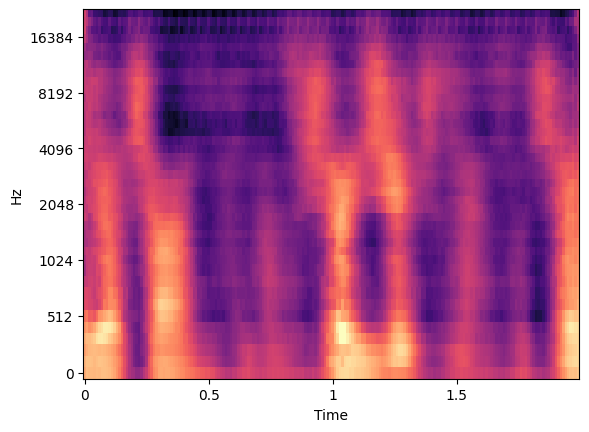

In [57]:
librosa.display.specshow(librosa.power_to_db(out_recon_bce, ref = np.max), y_axis='mel', sr=sr, 
                         hop_length=int(round(0.01 * sr)), x_axis='time')
plt.show()
# plt.savefig("./conv1d_exp_2_s10.png")

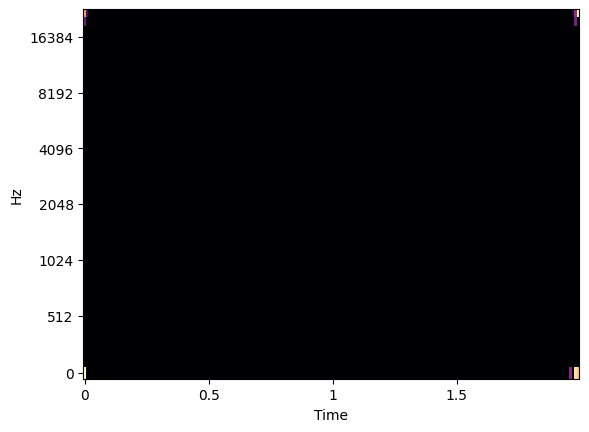

In [58]:
librosa.display.specshow(librosa.power_to_db(out_recon_l1, ref = np.max), y_axis='mel', sr=sr, 
                         hop_length=int(round(0.01 * sr)), x_axis='time')
plt.show()

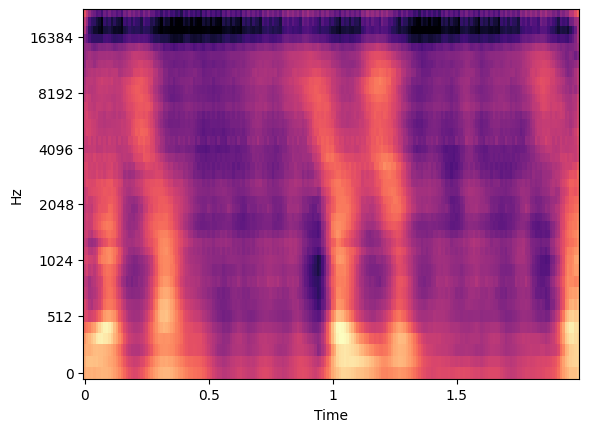

In [59]:
librosa.display.specshow(librosa.power_to_db(out_recon_re, ref = np.max), y_axis='mel', sr=sr, 
                         hop_length=int(round(0.01 * sr)), x_axis='time')
plt.show()

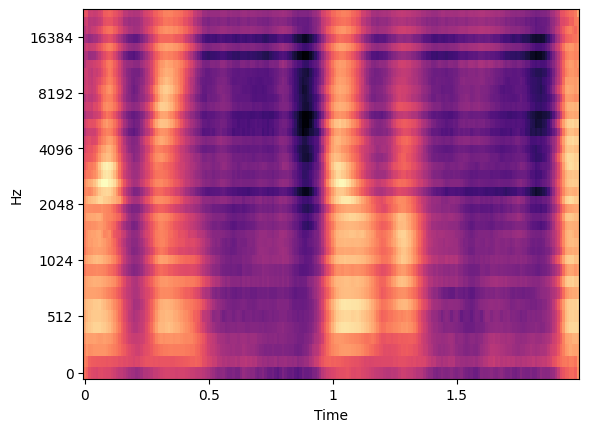

In [60]:
librosa.display.specshow(librosa.power_to_db(out_recon_1k, ref = np.max), y_axis='mel', sr=sr, 
                         hop_length=int(round(0.01 * sr)), x_axis='time')
plt.show()

In [39]:
print(np.mean(np.abs(out_recon_bce - sample_mel_ori)))
print(np.mean(np.abs(out_recon_l1 - sample_mel_ori)))
print(np.mean(np.abs(out_recon_re - sample_mel_re)))
print(np.mean(np.abs(out_recon_1k - sample_mel_1k)))

0.0040941816
0.004629585
0.0010783818
0.01783811


In [61]:
print(np.mean(np.abs(out_recon_bce - sample_mel_ori)))
print(np.mean(np.abs(out_recon_l1 - sample_mel_ori)))
print(np.mean(np.abs(out_recon_re - sample_mel_re)))
print(np.mean(np.abs(out_recon_1k - sample_mel_1k)))

0.0040233284
0.0032204282
0.00086641713
0.0034152942


In [37]:
librosa.mel_frequencies(n_mels=179,fmax=44100, fmin=0)[:40]

array([   0.        ,   26.2450767 ,   52.4901534 ,   78.73523011,
        104.98030681,  131.22538351,  157.47046021,  183.71553692,
        209.96061362,  236.20569032,  262.45076702,  288.69584372,
        314.94092043,  341.18599713,  367.43107383,  393.67615053,
        419.92122723,  446.16630394,  472.41138064,  498.65645734,
        524.90153404,  551.14661075,  577.39168745,  603.63676415,
        629.88184085,  656.12691755,  682.37199426,  708.61707096,
        734.86214766,  761.10722436,  787.35230106,  813.59737777,
        839.84245447,  866.08753117,  892.33260787,  918.57768458,
        944.82276128,  971.06783798,  997.31291468, 1024.59233006])

In [ ]:
from torchaudio.transforms import MelScale, Spectrogram

